In [ ]:
###LOADING DATA

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import pandas as pd
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
import nltk  
nltk.download('stopwords')
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional,Attention
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
summary_data=pd.read_csv('news_summary_more.csv',encoding='iso-8859-1')

In [ ]:
summ=summary_data['headlines']
text=summary_data['text']

In [ ]:
#DATA CLEANING

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))
cnt=0
for word in stop_words:
    print(word)
    cnt+=1
    if cnt==10:
        break

mustn't
all
its
that
ll
him
you're
against
on
off


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
def text_cleaner(text,is_summary=False):
    #converting string to lower case
    newString = text.lower()
    #removing special charcters like parentheses
    newString = re.sub(r'\([^)]*\)', '', newString)
    #removing quotes
    newString = re.sub('"','', newString)
    #contraction mappings
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) 
    #removing apostrophe s('s) 
    newString = re.sub(r"'s\b","",newString)
    #only keeping alphabets, i.e removing numbers etc
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    #removing stop words
    if is_summary==False:
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens = newString.split()
    long_words=[]
    #removing short words of length =1
    for i in tokens:
        if len(i)>=2:                  
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [ ]:
text[0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [ ]:
text_cleaner(text[0])

'saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers'

In [ ]:
cleaned_text=[]
cleaned_summ=[]
for txt in text:
    cleaned_text.append(text_cleaner(txt))
for txt in summ:
    cleaned_summ.append(text_cleaner(txt,is_summary=True))

In [ ]:
cleaned_text[1]

'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit'

In [ ]:
cleaned_summ[1]

'delhi techie wins free food from swiggy for one year on cred'

In [ ]:
#ADDING "_START_" and "_END_" tokens to the summary
final_summ=[]
for txt in cleaned_summ:
    final_summ.append('_START_ '+txt+' _END_')

In [ ]:
final_summ[0]

'_START_ upgrad learner switches to career in ml al with salary hike _END_'

In [ ]:
#GETTING LENGTH STATISTICS

In [ ]:
text_lengths=[]
for i in range(len(cleaned_text)):
    lmao=cleaned_text[i].split(' ')
    text_lengths.append(len(lmao))

In [ ]:
summ_lengths=[]
for i in range(len(final_summ)):
    lmao=final_summ[i].split(' ')
    summ_lengths.append(len(lmao))

(array([1.0000e+00, 0.0000e+00, 2.0000e+00, 2.3000e+02, 1.0770e+04,
        5.2335e+04, 3.2606e+04, 2.4150e+03, 4.0000e+01, 2.0000e+00]),
 array([ 1. ,  6.9, 12.8, 18.7, 24.6, 30.5, 36.4, 42.3, 48.2, 54.1, 60. ]),
 <a list of 10 Patch objects>)

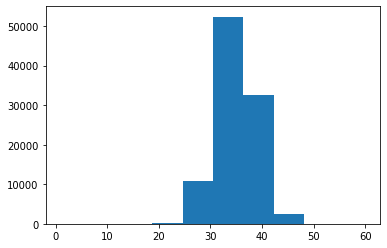

In [ ]:
import matplotlib.pyplot as plt

plt.hist(text_lengths,bins=10)

(array([3.0000e+00, 1.9310e+03, 5.3816e+04, 4.1474e+04, 1.1770e+03]),
 array([ 3.,  6.,  9., 12., 15., 18.]),
 <a list of 5 Patch objects>)

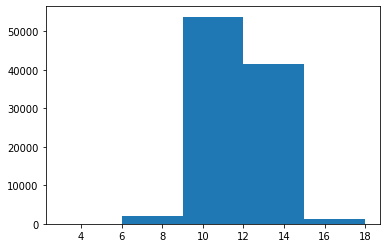

In [ ]:
plt.hist(summ_lengths,bins=5)

In [ ]:
import numpy as np
text_lengths=np.array(text_lengths)
summ_lengths=np.array(summ_lengths)

In [ ]:
np.percentile(text_lengths,99.5)

45.0

In [ ]:
np.percentile(summ_lengths,100)

18.0

In [ ]:
max_len_text=45 
max_len_summary=18

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(cleaned_text,final_summ,test_size=0.1,random_state=69,shuffle=True)
print(len(x_tr))
print(len(x_val))

88560
9841


In [ ]:
#TOKENIZER FOR THE TEXT 

In [ ]:
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(x_tr)

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [ ]:
x_tr[0]

array([   28,   100,   934,   489,   155,  5141,   354,    66,   296,
        3810,  1531,  7718,   133,  1531,   164, 11506,   321,  6300,
         489,    35,  2519,  5787,  1531,   200,  1081,   324,  2651,
         516,   489,  3810,  7718,  5187, 10535,  5738, 47117,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
x_voc_size

73180

In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(y_tr)

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [ ]:
y_tr[1]

array([    2,  2696, 12271,    15,   266,  1824,  5070,  1366,   959,
           1,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
y_voc_size

31387

In [ ]:
#DEFINING MODEL !!!!!!!!

In [ ]:
!git clone https://github.com/thushv89/attention_keras

Cloning into 'attention_keras'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 218 (delta 43), reused 73 (delta 24), pack-reused 109
Receiving objects: 100% (218/218), 213.21 KiB | 19.38 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
import sys
sys.path.insert(1, 'attention_keras/src/layers')

In [ ]:
from attention import AttentionLayer

In [ ]:
from keras import backend as K 
K.clear_session() 
embedding_dim = 200 
hidden_dim = 300

# Encoder(word index to embedding)
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, embedding_dim,trainable=True)(encoder_inputs) 
#LSTM 1 
encoder_lstm1 = LSTM(hidden_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
#LSTM 2 
encoder_lstm2 = LSTM(hidden_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
#LSTM 3 
encoder_lstm3=LSTM(hidden_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 
# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, hidden_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 
#LSTM using encoder_states as initial state
decoder_lstm = LSTM(hidden_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 
#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 
# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 45)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 45, 200)      14636000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 45, 300), (N 601200      embedding[0][0]                  
_____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=2)

In [ ]:
x_tr=np.array(x_tr)
x_val=np.array(x_val)
y_tr=np.array(y_tr)
y_val=np.array(y_val)
x_tr.shape,x_val.shape,y_tr.shape,y_val.shape

((88560, 45), (9841, 45), (88560, 18), (9841, 18))

In [ ]:
training=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 88560 samples, validate on 9841 samples
Epoch 1/50
88560/88560 [==============================] - 188s 2ms/sample - loss: 4.8477 - val_loss: 4.2176
Epoch 2/50
88560/88560 [==============================] - 183s 2ms/sample - loss: 4.2064 - val_loss: 4.0405
Epoch 3/50
88560/88560 [==============================] - 184s 2ms/sample - loss: 3.9735 - val_loss: 3.8235
Epoch 4/50
88560/88560 [==============================] - 185s 2ms/sample - loss: 3.7000 - val_loss: 3.5700
Epoch 5/50
88560/88560 [==============================] - 185s 2ms/sample - loss: 3.3855 - val_loss: 3.3423
Epoch 6/50
88560/88560 [==============================] - 186s 2ms/sample - loss: 3.1049 - val_loss: 3.1858
Epoch 7/50
88560/88560 [==============================] - 186s 2ms/sample - loss: 2.8580 - val_loss: 3.0783
Epoch 8/50
88560/88560 [==============================] - 186s 2ms/sample - loss: 2.6410 - val_loss: 

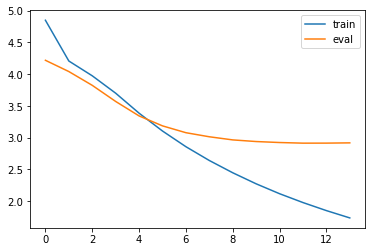

In [ ]:
plt.plot(training.history['loss'], label='train') 
plt.plot(training.history['val_loss'], label='eval') 
plt.legend()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])
# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(hidden_dim,))
decoder_state_input_c = Input(shape=(hidden_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,hidden_dim))
# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])
#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])
# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)
# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq,BEAM_SIZE=8):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
!pip install rouge-score

In [ ]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

In [ ]:
cnt=0
r1_p=0
r1_r=0
r1_f=0
rL_p=0
rL_r=0
rL_f=0
for i in range(len(x_val)):
    sys.stdout.write("\rTesting for {} of {}".format(i+1,len(x_val)))
    sys.stdout.flush()
    x1=seq2summary(y_val[i])
    try:
        x2=decode_sequence(x_val[i].reshape(1,max_len_text))
        scores = scorer.score(x1,x2)
        r1_p+=scores['rouge1'][0]
        r1_r+=scores['rouge1'][1]
        r1_f+=scores['rouge1'][2]
        rL_p+=scores['rougeL'][0]
        rL_r+=scores['rougeL'][1]
        rL_f+=scores['rougeL'][2]
    except:
        cnt+=1
print("\nStatistics not calculated for {} texts".format(cnt))
print("Rough-1 precision :{}".format(r1_p/len(x_val)))
print("Rough-1 recall :{}".format(r1_r/len(x_val)))
print("Rough-1 f-score :{}".format(r1_f/len(x_val)))
print("Rough-L precision :{}".format(rL_p/len(x_val)))
print("Rough-L recall :{}".format(rL_r/len(x_val)))
print("Rough-L f-score :{}".format(rL_f/len(x_val)))

Testing for 9841 of 9841Statistics not calculated for 1 texts
Rough-1 precision :0.1978264101272792
Rough-1 recall :0.19903869008633845
Rough-1 f-score :0.19653442305613134
Rough-L precision :0.1795213724885869
Rough-L recall :0.18094771524808234
Rough-L f-score :0.17849656811563663


In [ ]:
for i in range(0,10):
    print("News article:",seq2text(x_val[i]))
    print("Original summary:",seq2summary(y_val[i]))
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
    print("****************\n")

News article: least people killed others injured magnitude earthquake struck japan second biggest metropolis osaka monday reports said earthquake trigger tsunami warning nuclear plants area operating normally lakh households osaka neighbouring prefecture suffered temporary power outages 
Original summary: killed injured in magnitude earthquake in japan 
Predicted summary:  earthquake feared dead in mexico earthquake
****************

News article: actor ranveer singh gatecrashed wedding mumbai surprised couple approached mandap wished wedding taking place hotel ranveer promoting upcoming film simmba video actor seen welcomed wedding posing photographs guests 
Original summary: ranveer singh gatecrashes wedding in mumbai wishes the couple 
Predicted summary:  ranveer dances to ranveer at wedding at wedding reception
****************

News article: bcci decided extend indian women cricket team coach ramesh powar contract invited fresh applications post contract powar appointed august tus

In [ ]:
x=10
while 1:
    x+=1
    x-=1

KeyboardInterrupt: ignored